**<center> ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ</center>**
**<center>ГОРОДА МОСКВЫ</center>**
**<center>ДОПОЛНИТЕЛЬНОГО ПРОФЕССИОНАЛЬНОГО ОБРАЗОВАНИЯ</center>**
**<center>ЦЕНТР ПРОФЕССИОНАЛЬНЫХ КВАЛИФИКАЦИЙ И СОДЕЙСТВИЯ ТРУДОУСТРОЙСТВУ</center>**
**<center>«ПРОФЕССИОНАЛ»</center>**
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### <center> ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА </center>
<center> на тему </center>
<center> «Анализ данных с использованием Python» </center>
<center> (на примере анализа данных исследуемого продукта) </center> 
<center>слушателя Боруновой Татьяны Сергеевны <br>группы № 752 </center>
 <center>по программе профессиональной переподготовки </center>
<center> «Аналитик данных» </center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### <center> Москва, 2022

### Цель исследования:


Цель данного проекта — выявить, какие признаки имеют наибольшее влияние на рейтинг вина. Для анализа используется набор данных из Kaggle, крупнейшего в мире сообщества специалистов по данным и машинному обучению. Набор данных состоит из 13 признаков (2 числовых признака и 11 категориальных признаков).

Выполнение задачи предполагает выполнение следующих этапов исследования:<br>
<a href=#1>1.  Предобработка данных</a><br>
<a href=#2>2.  Исследовательский анализ данных</a><br>
<a href=#3>3.  Составление структуры развития рынка вина каждого региона.</a><br>
<a href=#4>4.  Проведение исследования статистических показателей зависимости цены вина от рейтинга в регионе.</a><br>
<a href=#5>5.  Проверка гипотез.</a><br>
<a href=#6>6.  Выводы</a><br>
 

### Столбцы данных для проведения исследования
Набор данных, используемых для проведения исследования содержит следующие столбцы:
- country — страна происхождения вина.<br>
- description — описание вкусового профиля вина.<br>
- designation — виноградник, ягоды которого используются при изготовлении вина.<br>
- points — оценка вина, согласно рейтинга журнала Wine Enthusiast, в баллах по шкале от 1 до 100.<br>
- price — стоимость одной бутылки вина.<br>
- province — место изготовления вина (провинция или штат).<br>
- region_1 — винодельческая область в провинции или штате (например, долина Напа в штате Калифорния).<br>
- region_2 — (необязательно) конкретный зона виноделия в винодельческой области (например, Резерфорд в долине Напа).<br>
- variety — сорт винограда, который используется при изготовлении вина (например, Пино Нуар).<br>
- winery — винодельня-производитель вина.<br>

#  <a name="1">1.Предобработка данных</a>

Предобработка данных предполагает выполнение следующих последовательных действий:
- Импортировать библиотеки.
- Загрузить данные.
- Заменить названия столбцов (привести к нижнему регистру).<br>
- Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему.<br>
- Обработать пропуски при необходимости. <br>
- Внести новый столбец "Континенты" в случае необходимости.<br>

country_to_continent = {<br>
'Italy':'Europe',<br>
'Portugal':'Europe',<br>
'US':'North America',<br>
'Spain':'Europe',<br>
'France':'Europe',<br>
'Germany':'Europe',<br>
'Argentina':'Latin America',<br>
'Chile':'Latin America',<br>
'Australia': 'Oceania',<br>
'Austria': 'Europe',<br>
'South Africa': 'Africa',<br>
'New Zealand': 'Oceania',<br>
'Israel': 'Asia', <br>
'Hungary':'Europe',<br>
'Greece':'Europe',<br>
'Romania':'Europe',<br>
'Mexico':'Latin America',<br>
'Canada':'North America',<br>
'Turkey': 'Asia',<br>
'Czech Republic': 'Europe',<br>
'Slovenia': 'Europe',<br>
'Luxembourg': 'Europe',<br>
'Croatia': 'Europe',<br>
'Georgia':'Europe',<br>
'Uruguay': 'Latin America',<br>
'England': 'Europe',<br>
'Lebanon': 'Asia',<br>
'Serbia': 'Europe',<br>
'Brazil': 'Latin America',<br>
'Moldova': 'Europe',<br>
'Morocco':'Africa',<br>
'Peru':'Latin America',<br>
'India':'Asia',<br>
'Bulgaria':'Europe',<br>
'Cyprus': 'Europe',<br>
'Armenia':'Asia',<br>
'Switzerland':'Europe',<br>
'Bosnia and Herzegovina':'Europe',<br>
'Ukraine':'Europe',<br>
'Slovakia':'Europe',<br>
'Macedonia':'Europe',<br>
'China':'Asia',<br>
'Egypt':'Africa'<br>
}

Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import scipy.stats as st
# импорт библиотеки warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Загрузка данных

Выполняем загрузку данных из открытого источника (платформы Kaggle) в формате *.csv

In [2]:
from google.colab import files
df = files.upload()


Saving winemag-data_first150k.csv to winemag-data_first150k.csv


In [3]:
df = pd.read_csv(filepath_or_buffer= 'winemag-data_first150k.csv', sep = ',')
df.head(7)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos


In [4]:
del df['Unnamed: 0']

Объектом нашего исследования являются вина Африки и Океании. 

In [5]:
country_to_continent = {
'Italy':'Europe',
'Portugal':'Europe',
'US':'North America',
'Spain':'Europe',
'France':'Europe',
'Germany':'Europe',
'Argentina':'Latin America',
'Chile':'Latin America',
'Australia': 'Africa&Oceania',
'Austria': 'Europe',
'South Africa': 'Africa&Oceania',
'New Zealand': 'Africa&Oceania',
'Israel': 'Asia',
'Hungary':'Europe',
'Greece':'Europe',
'Romania':'Europe',
'Mexico':'Latin America',
'Canada':'North America',
'Turkey': 'Asia',
'Czech Republic': 'Europe',
'Slovenia': 'Europe',
'Luxembourg': 'Europe',
'Croatia': 'Europe',
'Georgia':'Europe',
'Uruguay': 'Latin America',
'England': 'Europe',
'Lebanon': 'Asia',
'Serbia': 'Europe',
'Brazil': 'Latin America',
'Moldova': 'Europe',
'Morocco':'Africa&Oceania',
'Peru':'Latin America',
'India':'Asia',
'Bulgaria':'Europe',
'Cyprus': 'Europe',
'Armenia':'Asia',
'Switzerland':'Europe',
'Bosnia and Herzegovina':'Europe',
'Ukraine':'Europe',
'Slovakia':'Europe',
'Macedonia':'Europe',
'China':'Asia',
'Egypt':'Africa&Oceania'
}

In [6]:
df['continent']=df['country'].map(country_to_continent)
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery,continent
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,North America
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,Europe
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,North America
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,North America
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,Europe
...,...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio,Europe
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,Europe
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora,Europe
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset,Europe


In [7]:
df = df.loc[df['continent'] == 'Africa&Oceania']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10550 entries, 25 to 150854
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      10550 non-null  object 
 1   description  10550 non-null  object 
 2   designation  6139 non-null   object 
 3   points       10550 non-null  int64  
 4   price        10213 non-null  float64
 5   province     10550 non-null  object 
 6   region_1     4957 non-null   object 
 7   region_2     0 non-null      object 
 8   variety      10550 non-null  object 
 9   winery       10550 non-null  object 
 10  continent    10550 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 989.1+ KB


In [8]:
del df['region_1']
del df['region_2']
df

,country,description,designation,points,price,province,variety,winery,continent
25,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,Chardonnay,Kumeu River,Africa&Oceania
61,Australia,Moorooduc's estate Pinot Noir is a solid value...,NaN,91,36.0,Victoria,Pinot Noir,Moorooduc,Africa&Oceania
114,South Africa,Muted aromas of tart gooseberry and lime peel ...,Circumstance,86,20.0,Stellenbosch,Sauvignon Blanc,Waterkloof,Africa&Oceania
216,Morocco,"Tones of black cherry, toffee, tobacco, tar an...",Domaine Excelcio,93,35.0,Guerrouane,Syrah-Grenache,Bernard Magrez,Africa&Oceania
305,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,Chardonnay,Kumeu River,Africa&Oceania
...,...,...,...,...,...,...,...,...,...
150786,Australia,"Nutty, toasty and tropical-fruit elements are ...",Limited Release,90,38.0,South Australia,Chardonnay,Jacob's Creek,Africa&Oceania
150801,Australia,"This strongly-oaked wine has apple, lemon and ...",Reserve,88,16.0,South Australia,Chardonnay,Jacob's Creek,Africa&Oceania
150810,Australia,"Deep cassis aromas, a touch of licorice, and m...",NaN,88,11.0,South Australia,Cabernet Sauvignon,Jacob's Creek,Africa&Oceania
150819,Australia,"This defines mainstream, affordable Chardonnay...",NaN,87,10.0,South Australia,Chardonnay,Jacob's Creek,Africa&Oceania


Для дальнейшего анализа необходимо изучить данные. Создаем DataFrame (df) и с помощью метода .info() получаем детальную информацию о наборе данных в столбцах.  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10550 entries, 25 to 150854
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      10550 non-null  object 
 1   description  10550 non-null  object 
 2   designation  6139 non-null   object 
 3   points       10550 non-null  int64  
 4   price        10213 non-null  float64
 5   province     10550 non-null  object 
 6   variety      10550 non-null  object 
 7   winery       10550 non-null  object 
 8   continent    10550 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 824.2+ KB


Мы видим, что количество значений в столбцах различается. Это говорит о том, что в данных есть пустые значения. 

Признак points и price числовые. 


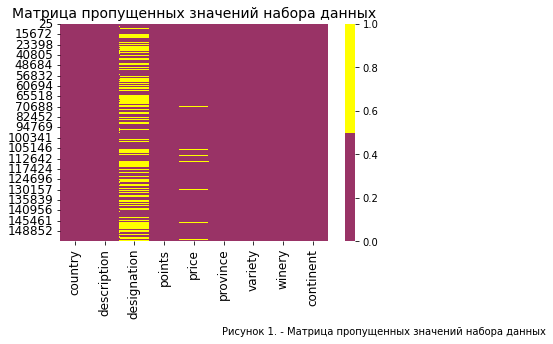

In [10]:
colours = ['#993366', '#FFFF00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
# Decorations
plt.title('Матрица пропущенных значений набора данных', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.5, -0.2, "Рисунок 1. - Матрица пропущенных значений набора данных")
plt.show()

In [11]:
df = df.dropna(subset = ['price']) #удаляем NAN в колонке 'price'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10213 entries, 25 to 150854
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      10213 non-null  object 
 1   description  10213 non-null  object 
 2   designation  5903 non-null   object 
 3   points       10213 non-null  int64  
 4   price        10213 non-null  float64
 5   province     10213 non-null  object 
 6   variety      10213 non-null  object 
 7   winery       10213 non-null  object 
 8   continent    10213 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 797.9+ KB


Нулевые значения в колонке designation удалять не будем, так как виноградник нам не важен.

In [12]:
print(df['country'].unique())

['New Zealand' 'Australia' 'South Africa' 'Morocco']


In [13]:
print(df['points'].unique())

[ 94  91  86  93  90  88  85  92  84  83  98  89  96  87  95  97  81  82
 100  80]


In [14]:
print(df['price'].unique())

[ 57.  36.  20.  35.  42.  11.  10.  16.  65.  22.  15.  25.  46.  33.
  40.  63.   9.  18.  49.  34. 125.  17.  61. 150.  29.  28. 500. 200.
  95. 185.  30.  90.  13.  55.  50. 120.  23.  54. 100.  26.  24.  19.
  21.  75.  14.  83.  45.  43.  31.  12.  60.  51.  39.  85.  44.  62.
  72.  37.  52. 850. 600. 225. 130. 105.  89.  84. 230.  69.  99.  27.
  41.  32.  70. 138.  38. 122. 108.   7.  58.   6.   8.  53.  47. 300.
  97. 140.   5. 109.  79.  56.  48.  80.  82.  66. 139.  86.  96.  78.
  94. 145. 220. 550. 250. 110. 350. 165. 160.  88.  64. 400.  59.  74.
  68.  67. 135. 190. 235. 175. 325. 102.  93. 625. 159.  73.]


In [15]:
print(df['province'].unique())

['Kumeu' 'Victoria' 'Stellenbosch' 'Guerrouane' 'Walker Bay'
 'South Australia' 'Western Cape' 'Overberg' 'Robertson' 'Tasmania'
 'Simonsberg-Paarl' 'Marlborough' 'Central Otago' 'Martinborough'
 'South Africa' 'Zenata' 'Nelson' 'Morocco' "Hawke's Bay"
 'Australia Other' 'Waipara' 'Western Australia' 'Awatere Valley'
 'New South Wales' 'New Zealand' 'Gisborne' 'Swartland' 'Hemel en Aarde'
 'Simonsberg-Stellenbosch' 'Tulbagh' 'Canterbury' 'Paarl' 'Coastal Region'
 'Jonkershoek Valley' 'Elgin' 'Durbanville' 'Polkadraai Hills' 'Malgas'
 'Omaka Valley' 'South Island' 'Bot River' 'Cederberg' 'Wellington'
 'Breedekloof' 'Franschhoek' 'Constantia' 'Cape Agulhas' 'Klein River'
 'Wairau Valley' 'Waiheke Island' 'Waipara Valley' 'Wairarapa' 'Darling'
 'Tradouw' 'Philadelphia' 'East Coast' 'Groenekloof' 'Eilandia'
 'Queensland' 'North Island' 'Eastern Bays' 'Marlborough & Hawkes Bay'
 'Ohiti Valley' 'Moutere' 'Cape South Coast' 'Central Otago-Marlborough'
 'Northern Cape' 'Breede River Valley' 'L

In [16]:
print(df['variety'].unique())

['Chardonnay' 'Pinot Noir' 'Sauvignon Blanc' 'Syrah-Grenache' 'Shiraz'
 'Chenin Blanc' 'Riesling' 'Syrah' 'Marsanne' 'Rosé' 'Cabernet-Shiraz'
 'Red Blend' 'Champagne Blend' 'Cabernet Sauvignon' 'Grenache'
 'Sparkling Blend' 'Cabernet Sauvignon-Shiraz' 'Pinot Gris' 'White Blend'
 'Gewürztraminer' 'Cabernet Sauvignon Grenache' 'Bordeaux-style Red Blend'
 'Sémillon' 'Shiraz-Viognier' 'Sauvignon Blanc-Semillon'
 'Rhône-style Red Blend' 'Pinot Grigio' 'Rhône-style White Blend'
 'Shiraz-Grenache' 'Viognier' 'Viognier-Marsanne' 'Pinotage'
 'Chardonnay-Semillon' 'Merlot' 'Cabernet Merlot' 'Syrah-Viognier'
 'Verdelho' 'Merlot-Cabernet Sauvignon' 'Steen'
 'Chenin Blanc-Sauvignon Blanc' 'Shiraz-Cabernet Sauvignon'
 'Cabernet Blend' 'Chenin Blanc-Viognier' 'Petit Verdot' 'G-S-M'
 'Grenache-Shiraz' 'Cabernet Sauvignon-Merlot' 'Grenache-Syrah'
 'Cabernet Sauvignon-Malbec' 'Moscato' 'Chardonnay-Viognier'
 'Shiraz-Pinotage' 'Muscat' 'Tokay' 'Muscadel' 'Port'
 'Semillon-Sauvignon Blanc' 'Syrah-Mourvèdr

In [17]:
print(df['winery'].unique())

['Kumeu River' 'Moorooduc' 'Waterkloof' ... 'Screwed' 'Red Bucket'
 'White Knot']


Вывод:

*   Предобработка выполнена.
*   Были выгружены данные.
*   Удалены пустые строчки.
*   Колонки типа object: country, description, designation, province, variety, winery, continent. Колонки типа int64: points. Колонки типа float64: price.

# 2. Исследовательский анализ данных
Исследовательский анализ данных включает в себя выполнение следующих этапов:
* Найти популярные сорта по регионам.
* Выбрать сорта вина с наибольшей стоимостью. Для каждого региона найти среднюю цену вина.
* Определить популярные сорта вина в бюджетном сегменте.
* Определить, какие сорта вина лидируют по рейтингам. 
* Построить график «ящик с усами» по рейтингам, выполнив категоризацию по странам, по сортам вина.
* Выявить закономерность влияния  рейтинга вина на его цену. Построить диаграмму рассеяния и посчитать корреляцию. 


In [18]:
df.describe(include=[np.number])

,points,price
count,10213.000000,10213.000000
mean,87.633213,26.895721
std,2.706892,29.114436
min,80.000000,5.000000
25%,86.000000,15.000000
50%,88.000000,20.000000
75%,90.000000,30.000000
max,100.000000,850.000000


Среднее значение цены 26,9, медиана 20. Значит для анализа цены данные нужно выбирать, потому что они искажают результаты анализа данных

In [19]:
df.describe(include=[object])

,country,description,designation,province,variety,winery,continent
count,10213,10213,5903,10213,10213,10213,10213
unique,4,6317,1910,73,105,1162,1
top,Australia,"Although it starts out with woodsy scents, thi...",Reserve,South Australia,Shiraz,D'Arenberg,Africa&Oceania
freq,4894,4,229,2955,1668,153,10213


## 2.1 Найдем самые популярные сорта в Африке и Океании.

In [20]:
popular = df
popular['count'] = popular['variety']
popular = popular.groupby((['country', 'variety']), as_index = False)[['count']].count() 
popularsort = popular.sort_values(axis=0, by=['count'], ascending=False) 
popularsort['%'] = round((100*popularsort['count']/popularsort['count'].sum()), 2)
popularsort.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,variety,count,%
61,Australia,Shiraz,1419,13.89
111,New Zealand,Sauvignon Blanc,1085,10.62
107,New Zealand,Pinot Noir,856,8.38
14,Australia,Chardonnay,667,6.53
5,Australia,Cabernet Sauvignon,642,6.29


Наиболее популярные вина в Африке и Океании производятся в Австралии и Новой Зеландии и это сорта: Sauvignon Blanc, Chardonnay, Shiraz, Cabernet Sauvignon и Pinot Noir.

In [21]:
popularsort.loc[(popularsort['country']=="Morocco") & (popularsort['count'])]

,country,variety,count,%
81,Morocco,Chardonnay,1,0.01
80,Morocco,Cabernet Sauvignon Grenache,1,0.01
83,Morocco,Sauvignon Blanc,1,0.01
84,Morocco,Shiraz,1,0.01


В Морокко выпускают 4 вида вин:Cabernet Sauvignon Grenache, Chardonnay, Sauvignon Blanc и Shiraz. И они же самые популярные.

In [22]:
popularsort.loc[(popularsort['country']=="South Africa") & (popularsort['count'])].head(5)

,country,variety,count,%
126,South Africa,Cabernet Sauvignon,213,2.09
156,South Africa,Red Blend,205,2.01
135,South Africa,Chenin Blanc,175,1.71
121,South Africa,Bordeaux-style Red Blend,123,1.20
178,South Africa,White Blend,67,0.66


Наиболее популярные сорта вин в Южной Африке: Bordeaux-style Red Blend, Chenin Blanc, White Blend, Cabernet Sauvignon и Red Blend.

## 2.2 Выбрать сорта вина с наибольшей стоимостью. Для каждого региона найти среднюю цену вина.

In [23]:
expensive = df.groupby((['country', 'variety', 'price']), as_index = False)['price'].max()
expensivesort = expensive.sort_values(axis=0, by=['price'], ascending=False)
expensivesort.head()

,country,variety,price
698,Australia,Shiraz,850.0
697,Australia,Shiraz,625.0
696,Australia,Shiraz,600.0
695,Australia,Shiraz,550.0
106,Australia,Cabernet Sauvignon,500.0


В Южной Африке и Океании самые дорогие вина: Shiraz и Cabernet Sauvignon

In [24]:
expensive.loc[(expensive['country']=="Morocco") & (expensive['price'])].mean()

price    19.181818
dtype: float64

In [25]:
expensive.loc[(expensive['country']=="South Africa") & (expensive['price'])].mean()

price    27.167689
dtype: float64

In [26]:
expensive.loc[(expensive['country']=="Australia") & (expensive['price'])].mean()

price    42.844649
dtype: float64

In [27]:
expensive.loc[(expensive['country']=="New Zealand") & (expensive['price'])].mean()

price    32.996656
dtype: float64

Средняя цена вин Морокко 19.18, Южной Африки 27.17, Новой Зеландии 32.0, а в Австралии 42.84

## 2.3 Определить популярные сорта вина в бюджетном сегменте.

В Африке  и Океании представлены вина с высокими оценками и низкими ценами, поэтому бюджетным сегментом будем считать вина от 5 до 20$ (от минимума до медианы).

In [28]:
pointscheap = df.loc[(df['price'] <= 20)].nlargest(5, 'points')
pointscheap

,country,description,designation,points,price,province,variety,winery,continent,count
42669,Australia,Lovely dessert-style Riesling at an extremely ...,The Noble Wrinkled,94,19.0,South Australia,Riesling,D'Arenberg,Africa&Oceania,Riesling
94809,Australia,Lovely dessert-style Riesling at an extremely ...,The Noble Wrinkled,94,19.0,South Australia,Riesling,D'Arenberg,Africa&Oceania,Riesling
119769,Australia,Lovely dessert-style Riesling at an extremely ...,The Noble Wrinkled,94,19.0,South Australia,Riesling,D'Arenberg,Africa&Oceania,Riesling
68126,South Africa,This big boy greets us with his deep ruby/blac...,NaN,93,15.0,Stellenbosch,Cabernet Sauvignon,Simonsig,Africa&Oceania,Cabernet Sauvignon
131047,South Africa,This is a seriously impressive wine. Its black...,NaN,93,20.0,Stellenbosch,Cabernet Sauvignon,Jardin,Africa&Oceania,Cabernet Sauvignon


Наиболее популярны Riesling и Cabernet Sauvignon. Стоимостью 20, 19 и 15$.

## 2.4 Определить, какие сорта вина лидируют по рейтингам.

In [29]:
pointslarge = df.nlargest(5, 'points')
pointslarge

,country,description,designation,points,price,province,variety,winery,continent,count
19355,Australia,Not a Cellar Selection in the traditional sens...,Rare,100,300.0,Victoria,Muscat,Chambers Rosewood Vineyards,Africa&Oceania,Muscat
84035,Australia,Not a Cellar Selection in the traditional sens...,Rare,100,300.0,Victoria,Muscat,Chambers Rosewood Vineyards,Africa&Oceania,Muscat
119195,Australia,Not a Cellar Selection in the traditional sens...,Rare,100,300.0,Victoria,Muscat,Chambers Rosewood Vineyards,Africa&Oceania,Muscat
2148,Australia,Full-bodied and plush yet vibrant and imbued w...,The Factor,98,125.0,South Australia,Shiraz,Torbreck,Africa&Oceania,Shiraz
10505,Australia,This has all the size and weight you've come t...,Grange,98,850.0,South Australia,Shiraz,Penfolds,Africa&Oceania,Shiraz


Самые высокие оценки получили сорта: Muscat и Shiraz.

## 2.5 Построить график «ящик с усами» по рейтингам, выполнив категоризацию по странам, по сортам вина.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


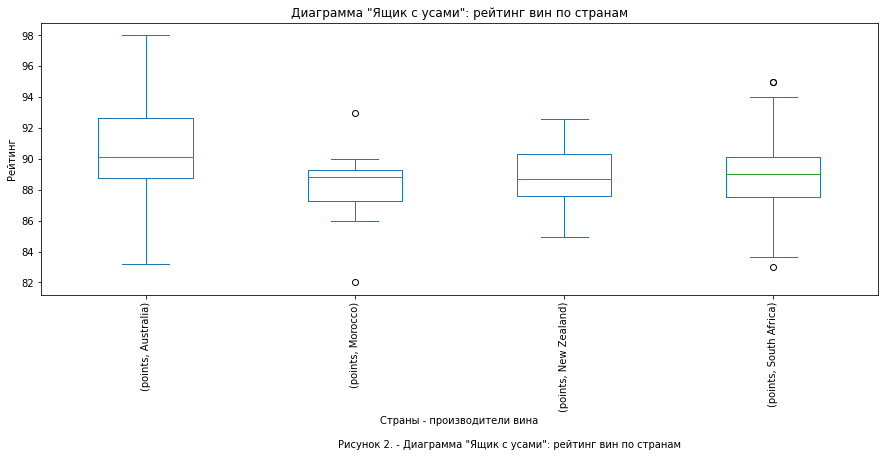

In [30]:
df.pivot_table(columns='country', index='price').plot.box(rot=90, figsize=(15,5))
plt.grid
plt.title('Диаграмма "Ящик с усами": рейтинг вин по странам')
plt.xlabel('Страны - производители вина')
plt.ylabel('Рейтинг')
plt.figtext(0.4, -0.3, 'Рисунок 2. - Диаграмма "Ящик с усами": рейтинг вин по странам')
plt.show()

В нашей таблице мало данных по Морокко, поэтому разброс рейтингов маленький, но средние оценки в Морокко и Южной Африке и Новой Зеландии почти одинаковые. А в Австралии средняя оценка выше.

In [31]:
p = plt.figure(figsize=(15,5))
varietyval = df['variety'].value_counts().head(10)
#varietyval.to_frame(name = 'count')
varietyvalplot = df[df.variety.isin(varieryval.index)]
x = varietyval.variety
y = varietyval.points
sns.boxplot(x,y);
plt.xlabel('Сорт вина', fontsize=12);
plt.ylabel('Рейтинг', fontsize=12);
plt.title('Распределение рейтингов вина (ТОП 10 сортов)', fontsize=14);
plt.figtext(0.35, -0.05, 'Рисунок 3. - Диаграмма "Ящик с усами": Распределение рейтингов вина')
#varietyval

NameError: ignored

<Figure size 1080x360 with 0 Axes>

## 2.6 Выявить закономерность влияния рейтинга вина на его цену. Построить диаграмму рассеяния и посчитать корреляцию.

Text(0.4, -0.05, 'Рисунок 4. - Зависимость цены вина от рейтинга')

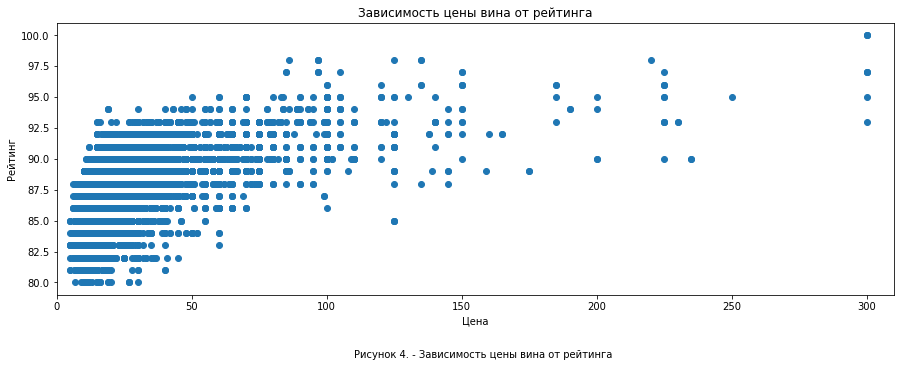

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(df['price'], df['points'])
plt.xlim(0, 310)
plt.title('Зависимость цены вина от рейтинга')
plt.xlabel('Цена')
plt.ylabel('Рейтинг')
plt.figtext(0.4, -0.05, 'Рисунок 4. - Зависимость цены вина от рейтинга')


Видна зависимость цены от рейтинга, но она не прямая. Можно предположить, что существуют и другие факторы влияющие на ценообразование. Так же видно, что есть выбросы, которые мы уберем далее

In [34]:
df.corr(method = 'pearson')

,points,price
points,1.000000,0.485209
price,0.485209,1.000000


Text(0.4, -0.05, 'Рисунок 5 - Диаграмма рассеивания')

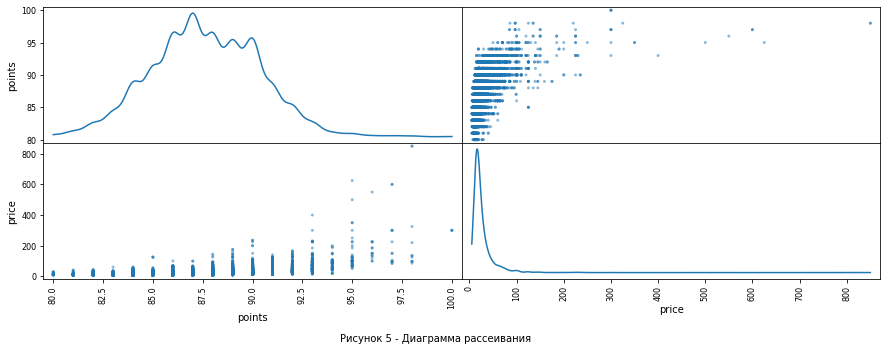

In [35]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.5, figsize=(15,5), diagonal='kde')
plt.figtext(0.4, -0.05, 'Рисунок 5 - Диаграмма рассеивания')

Коэффициент корреляции равен 0,49 - это слабая корреляция. Значит много выбросов. Что бы увидеть зависимость уберем выбросы.

In [36]:
q25 = df['price'].quantile(0.25)
q75 = df['price'].quantile(0.75)
iqr = q75 - q25
low = q25-1.5*iqr
hight = q75+1.5*iqr
low, hight

(-7.5, 52.5)

In [37]:
df1 = df[(df.price<hight)]

In [38]:
df1.corr(method = 'pearson')

,points,price
points,1.000000,0.512915
price,0.512915,1.000000


Если продолжить убирать выбросы, коэффициент корреляции станет ниже, значит удаление выбросов не эффективно, корреляция цена - оценка слабая.

Вывод по этапу "Исследовательский анализ данных":  *переписать*
Объектом исследования данной работы являются вина Африки и Океании. В таблице представлены вина Южной Африки, Морокко, Австралии и Новой Зеландии.  

*   Наиболее популярные вина в Африке и Океании производятся в Австралии и Новой Зеландии и это сорта: Sauvignon Blanc, Chardonnay, Shiraz, Cabernet Sauvignon и Pinot Noir. В Морокко выпускают 4 вида вин:Cabernet Sauvignon Grenache, Chardonnay, Sauvignon Blanc и Shiraz. И они же самые популярные. Наиболее популярные сорта вин в Южной Африке: Bordeaux-style Red Blend, Chenin Blanc, White Blend, Cabernet Sauvignon и Red Blend.
*   В Южной Африке и Океании самые дорогие вина: Shiraz и Cabernet Sauvignon. Средняя цена вин Морокко 19.18, Австралии 42.84, Новой Зеландии 33 а Южной Африки 27.17.
*   Наиболее популярны Riesling и Cabernet Sauvignon. Стоимостью 20, 19 и 15$.
*   Самые высокие оценки получили сорта: Muscat и Shiraz.
*   В нашей таблице мало данных по Морокко, поэтому разброс рейтингов маленький, но средние оценки в Морокко и Южной Африке и Новой Зеландии почти одинаковые. А в Австралии средняя оценка выше.
*   Видна зависимость цены от рейтинга, но она не прямая. Можно предположить, что существуют и другие факторы влияющие на ценообразование. Коэффициент корреляции равен 0,49 - это слабая корреляция. Если убирать выбросы, коэффициент корреляции станет ниже, значит удаление выбросов не эффективно. Корреляция цена - оценка слабая.

# 3. Составление структуры развития рынка вина регионов

В рамках составления структуры развития рынка вина в регионах необходимо определить:
* Самые популярные сорта (топ-5). 
* Влияет ли рейтинг на цены по регионам?

## 3.1 Самые популярные сорта (топ-5).

In [39]:
safrica = df.loc[df['country'] == 'South Africa']
australia = df.loc[df['country'] == 'Australia']
nzeland = df.loc[df['country'] == 'New Zealand']

In [40]:
populars = safrica
populars['count'] = populars['variety']
populars = populars.groupby((['country', 'variety']), as_index = False)[['count']].count() 
popularssort = populars.sort_values(axis=0, by=['count'], ascending=False)
popularssort['%'] = round((100*popularssort['count']/popularssort['count'].sum()), 2)
popularssort.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,variety,count,%
40,South Africa,Sauvignon Blanc,338,15.11
11,South Africa,Chardonnay,274,12.25
43,South Africa,Shiraz,248,11.09
5,South Africa,Cabernet Sauvignon,213,9.52
35,South Africa,Red Blend,205,9.16


Наиболее популярные вина в Африке и Океании производятся в Южной Африке и это сорта: Sauvignon Blanc, Chardonnay, Shiraz, Cabernet Sauvignon и Red Blend.

## 3.2 Влияет ли рейтинг на цены по регионам?

In [41]:
safrica.corr(method = 'pearson')

,points,price
points,1.000000,0.561072
price,0.561072,1.000000


Коэффициент корреляции равен 0,56 - это слабая корреляция.

Text(0.4, -0.05, 'Рисунок 6. - Зависимость цены вина от рейтинга Южная Африка')

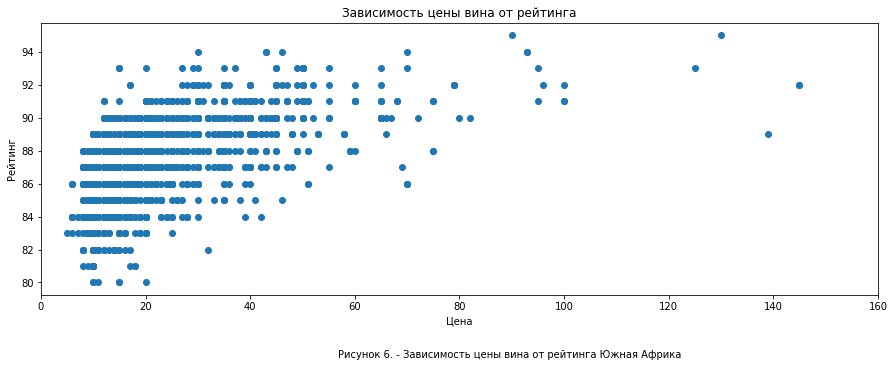

In [42]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(safrica['price'], safrica['points'])
plt.xlim(0, 160)
plt.title('Зависимость цены вина от рейтинга')
plt.xlabel('Цена')
plt.ylabel('Рейтинг')
plt.figtext(0.4, -0.05, 'Рисунок 6. - Зависимость цены вина от рейтинга Южная Африка')

На графике линейная зависимость не прослеживается. Это может говорить о большом количестве выбросов, или о том, что на цену влияют другие факторы.
Если выбросы убрать, коэффициент становится ниже.

In [43]:
populara = australia
populara['count'] = populara['variety']
populara = populara.groupby((['country', 'variety']), as_index = False)[['count']].count() 
popularasort = populara.sort_values(axis=0, by=['count'], ascending=False)
popularasort['%'] = round((100*popularasort['count']/popularasort['count'].sum()), 2)
popularasort.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,variety,count,%
61,Australia,Shiraz,1419,28.99
14,Australia,Chardonnay,667,13.63
5,Australia,Cabernet Sauvignon,642,13.12
49,Australia,Riesling,279,5.70
44,Australia,Pinot Noir,189,3.86


Наиболее популярные вина в Африке и Океании производятся в Южной Африке и это сорта: Sauvignon Blanc, Chardonnay, Shiraz, Cabernet Sauvignon и Red Blend.

In [44]:
australia.corr(method = 'pearson')

,points,price
points,1.000000,0.515197
price,0.515197,1.000000


Коэффициент корреляции равен 0,52 - это слабая корреляция.

Text(0.4, -0.05, 'Рисунок 6. - Зависимость цены вина от рейтинга Южная Африка')

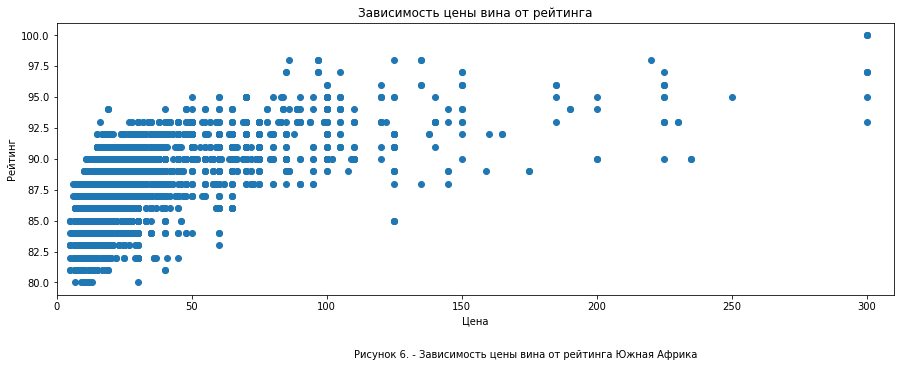

In [45]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(australia['price'], australia['points'])
plt.xlim(0, 310)
plt.title('Зависимость цены вина от рейтинга')
plt.xlabel('Цена')
plt.ylabel('Рейтинг')
plt.figtext(0.4, -0.05, 'Рисунок 6. - Зависимость цены вина от рейтинга Южная Африка')

На графике линейная зависимость не прослеживается. Это может говорить о большом количестве выбросов, или о том, что на цену влияют другие факторы. Если выбросы убрать, коэффициент становится ниже.

In [46]:
popularn = nzeland
popularn['count'] = popularn['variety']
popularn = popularn.groupby((['country', 'variety']), as_index = False)[['count']].count() 
popularnsort = popularn.sort_values(axis=0, by=['count'], ascending=False)
popularnsort['%'] = round((100*popularnsort['count']/popularnsort['count'].sum()), 2)
popularnsort.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,variety,count,%
23,New Zealand,Sauvignon Blanc,1085,35.34
19,New Zealand,Pinot Noir,856,27.88
7,New Zealand,Chardonnay,425,13.84
22,New Zealand,Riesling,273,8.89
18,New Zealand,Pinot Gris,132,4.30


In [47]:
nzeland.corr(method = 'pearson')

,points,price
points,1.000000,0.429265
price,0.429265,1.000000


Коэффициент корреляции равен 0,43 - это слабая корреляция.

Text(0.4, -0.05, 'Рисунок 6. - Зависимость цены вина от рейтинга Южная Африка')

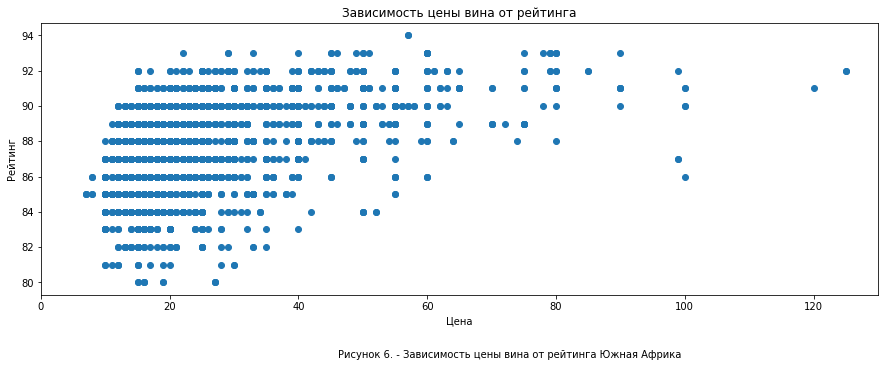

In [48]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(nzeland['price'], nzeland['points'])
plt.xlim(0, 130)
plt.title('Зависимость цены вина от рейтинга')
plt.xlabel('Цена')
plt.ylabel('Рейтинг')
plt.figtext(0.4, -0.05, 'Рисунок 6. - Зависимость цены вина от рейтинга Южная Африка')

На графике линейная зависимость не прослеживается. Это может говорить о большом количестве выбросов, или о том, что на цену влияют другие факторы. Если выбросы убрать, коэффициент становится ниже.

Вывод:  
*   Наиболее популярные вина в Африке и Океании производятся в Южной Африке и это сорта: Sauvignon Blanc, Chardonnay, Shiraz, Cabernet Sauvignon и Red Blend.
*   В Африке, Австралии и Новой Зеландии коэффициент корреляции около 0,5 это слабая корреляция.
*   На графике линейная зависимость не прослеживается. 
*   Если выбросы убрать, коэффициент становится ниже. Значит модель линейной регрессии не подходит.

# 4. Исследование статистических показателей зависимости цены вина от рейтинга в регионе.

В рамках исследования статистических показателей необходимо построить линейную регрессию зависимости между ценой продукта и его рейтингом.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [50]:
#задаем х, у как нецелевой и целевой набор признаков объекта
X = safrica[['points']]
Y = safrica[['price']]
#определяем размер тестовой и тренировочной выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=10)

In [51]:
#добавляем константу для создания пересечения
X_train_sm = sm.add_constant(X_train)
#подгоняем прямую регрессии, используя OLS
lr = sm.OLS(Y_train, X_train_sm).fit()

In [52]:
#выводим праметры, то есть пересечение и наклон установленной линии регрессии 
lr.params

const    -260.622624
points      3.230073
dtype: float64

In [53]:
#выполнение сводной операции выводит список всех различных параметров 
#установленной линии регрессии
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     681.4
Date:                Thu, 29 Sep 2022   Prob (F-statistic):          5.64e-125
Time:                        10:40:09   Log-Likelihood:                -6077.1
No. Observations:                1565   AIC:                         1.216e+04
Df Residuals:                    1563   BIC:                         1.217e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -260.6226     10.794    -24.146      0.0

R квадрат равен 0,304, значит линейная регрессия нам не подходит.
price = -260.6226+3.2301 * points
При увеличении на единицу рейтинга цена возрастает на -260.6226+3.2301*рейтинг. 

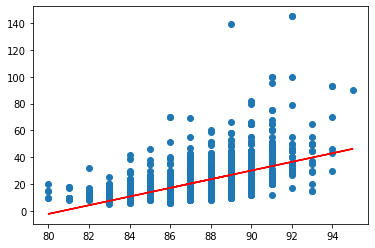

Text(0.5, -0.05, 'Рисунок 7 - линейная регрессия')

<Figure size 432x288 with 0 Axes>

In [54]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, -260.6226+3.2301*X_train, 'r')
plt.show()
plt.figtext(0.5, -0.05, "Рисунок 7 - линейная регрессия")

Вывод:
*   R квадрат равен 0,304, значит линейная регрессия нам не подходит. price = -260.6226+3.2301 * points При увеличении на единицу рейтинга цена возрастает на -260.6226+3.2301*рейтинг.
*   Применение модели линейной регрессии не эффективно. Нужно использовать более точные модели



# 5. Проверка гипотез

На основе проведенном анализе, были выявлены некоторые закономерности. Это позволяет сформулировать следующие гипотезы:

* H0: Средние пользовательские рейтинги красного и белого вина одинаковые.

  H1:Средние пользовательские рейтинги красного и белого вина разные.


* H0:Средние цены двух популярных сортов вина одинаковые.

  H1:Средние цены двух популярных сортов вина разные.

* Пороговое значение alpha - необходимо задать самостоятельно.

## 5.1 H0: Средние пользовательские рейтинги красного и белого вина одинаковые.

## H1:Средние пользовательские рейтинги красного и белого вина разные.

In [55]:
from sklearn.preprocessing import LabelEncoder
import copy
import scipy.stats as stats

In [56]:
color = {
"Chardonnay": "white",
"Pinot Noir": "red",
"Cabernet Sauvignon": "red",
"Red Blend": "red",
"Bordeaux-style Red Blend": "red",
"Sauvignon Blanc": "white",
"Syrah": "red",
"Riesling": "red",
"Merlot": "red",
"Zinfandel": "red",
"Sangiovese": "red",
"Malbec": "red",
"White Blend": "white",
"Rosé": "other",
"Tempranillo": "red",
"Nebbiolo": "red",
"Portuguese Red": "red",
"Sparkling Blend": "other",
"Shiraz": "red",
"Corvina, Rondinella, Molinara": "red",
"Rhône-style Red Blend": "red",
"Barbera": "red",
"Pinot Gris": "white",
"Viognier": "white",
"Bordeaux-style White Blend": "white",
"Champagne Blend": "other",
"Port": "red",
"Grüner Veltliner": "white",
"Gewürztraminer": "white",
"Portuguese White": "white",
"Petite Sirah": "red",
"Carmenère": "red",
"Syrah-Grenache": "red",
"Semillon-Chardonnay": "white"
}
df['color']=df['variety'].map(color)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,country,description,designation,points,price,province,variety,winery,continent,count,color
25,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,Chardonnay,Kumeu River,Africa&Oceania,Chardonnay,white
61,Australia,Moorooduc's estate Pinot Noir is a solid value...,NaN,91,36.0,Victoria,Pinot Noir,Moorooduc,Africa&Oceania,Pinot Noir,red
114,South Africa,Muted aromas of tart gooseberry and lime peel ...,Circumstance,86,20.0,Stellenbosch,Sauvignon Blanc,Waterkloof,Africa&Oceania,Sauvignon Blanc,white
216,Morocco,"Tones of black cherry, toffee, tobacco, tar an...",Domaine Excelcio,93,35.0,Guerrouane,Syrah-Grenache,Bernard Magrez,Africa&Oceania,Syrah-Grenache,red
305,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,Chardonnay,Kumeu River,Africa&Oceania,Chardonnay,white
...,...,...,...,...,...,...,...,...,...,...,...
150786,Australia,"Nutty, toasty and tropical-fruit elements are ...",Limited Release,90,38.0,South Australia,Chardonnay,Jacob's Creek,Africa&Oceania,Chardonnay,white
150801,Australia,"This strongly-oaked wine has apple, lemon and ...",Reserve,88,16.0,South Australia,Chardonnay,Jacob's Creek,Africa&Oceania,Chardonnay,white
150810,Australia,"Deep cassis aromas, a touch of licorice, and m...",NaN,88,11.0,South Australia,Cabernet Sauvignon,Jacob's Creek,Africa&Oceania,Cabernet Sauvignon,red
150819,Australia,"This defines mainstream, affordable Chardonnay...",NaN,87,10.0,South Australia,Chardonnay,Jacob's Creek,Africa&Oceania,Chardonnay,white


In [57]:
df = df.dropna(subset = ['color'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8816 entries, 25 to 150854
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      8816 non-null   object 
 1   description  8816 non-null   object 
 2   designation  5006 non-null   object 
 3   points       8816 non-null   int64  
 4   price        8816 non-null   float64
 5   province     8816 non-null   object 
 6   variety      8816 non-null   object 
 7   winery       8816 non-null   object 
 8   continent    8816 non-null   object 
 9   count        8816 non-null   object 
 10  color        8816 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 826.5+ KB


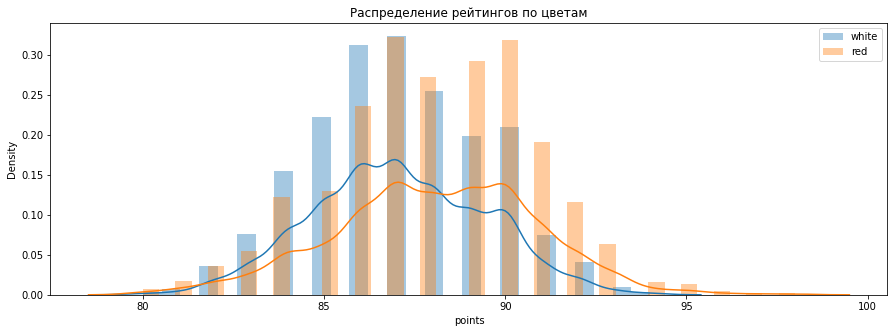

Text(0.5, -0.05, 'Рисунок 10 - Распределение рейтингов по цветам')

<Figure size 432x288 with 0 Axes>

In [58]:
dfw = df[df.loc[:, 'color'].isin(['white'])]
dfr = df[df.loc[:, 'color'].isin(['red'])]
mpw = dfw.filter(items=['points'])
mpr = dfr.filter(items=['points'])
f, ax = plt.subplots(figsize=(15,5))
sns.distplot(mpw.points, ax=ax, label = 'white')
sns.distplot(mpr.points, ax=ax, label = 'red')
plt.title('Распределение рейтингов по цветам')
plt.legend()
plt.show()
plt.figtext(0.5, -0.05, "Рисунок 10 - Распределение рейтингов по цветам")


In [59]:
H0 = "Средние пользовательские рейтинги красного и белого вина одинаковые."
H1 = "Средние пользовательские рейтинги красного и белого вина разные."

f_stat, p_value = stats.ttest_ind(mpw, mpr, axis=0)
print('f_stat=', f_stat, 'p_value=', p_value)
if p_value <0.05:
  print()
  print(f'{H1}, \nтк значение p_value: ({p_value}) < 0.05')
else:
    print()
    print(f'{H0}, \nтк значение p_value: ({p_value}) > 0.05')

f_stat= [-17.89553031] p_value= [2.35590727e-70]

Средние пользовательские рейтинги красного и белого вина разные., 
тк значение p_value: ([2.35590727e-70]) < 0.05


# 5.2 H0:Средние цены двух популярных сортов вина одинаковые.

# H1:Средние цены двух популярных сортов вина разные.

In [60]:
dfer = df.groupby(by = ['variety'], as_index=False)['points'].max()\
.sort_values('points', ascending=False).head(2)
dfer                                                                                                                

,variety,points
22,Syrah,98
20,Shiraz,98


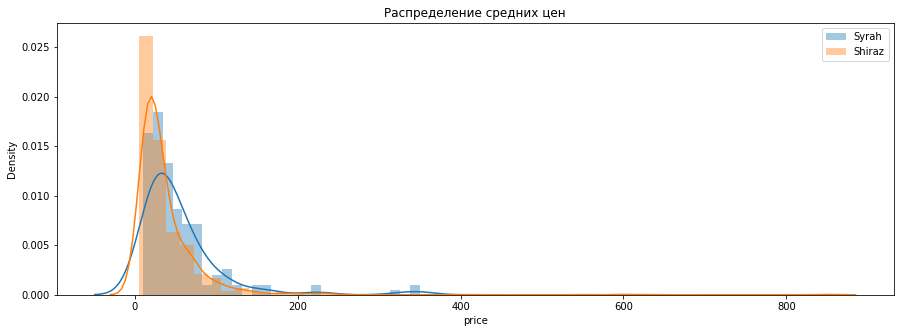

Text(0.5, -0.05, 'Рисунок 11 - Распределение средних цен')

<Figure size 432x288 with 0 Axes>

In [61]:
dfsy = df[df.loc[:,'variety'].isin(['Syrah'])]
dfsh = df[df.loc[:,'variety'].isin(['Shiraz'])]
mpsy = dfsy.filter(items=['price'])
mpsh = dfsh.filter(items=['price'])
f, ax = plt.subplots(figsize=(15,5))
sns.distplot(mpsy.price, ax=ax, label='Syrah')
sns.distplot(mpsh.price, ax=ax, label='Shiraz')
plt.title('Распределение средних цен')
plt.legend()
plt.show()
plt.figtext(0.5, -0.05, "Рисунок 11 - Распределение средних цен")

In [62]:
H0 = "Средние цены двух популярных сортов вина одинаковые."
H1 = "Средние цены двух популярных сортов вина разные."
f_stat, p_value = stats.ttest_ind(mpsy, mpsh, axis=0)
print('f_stat=', f_stat, 'p_value=', p_value)
if p_value <0.05:
  print()
  print(f'{H1}, \nтк значение p_value: ({p_value}) < 0.05')
else:
    print()
    print(f'{H0}, \nтк значение p_value: ({p_value}) > 0.05')

f_stat= [3.87309523] p_value= [0.00011125]

Средние цены двух популярных сортов вина разные., 
тк значение p_value: ([0.00011125]) < 0.05


Вывод:  
*   Средние пользовательские рейтинги красного и белого вина разные., 
так как значение p_value: 2.35590727e-70 < 0.05
*   Средние цены двух популярных сортов вина разные., 
так как значение p_value: 0.00011125 < 0.05

# 6. Выводы



*   Была выполнена предобработка, выгрузка данных. Удалены пустые строчки.
Определены типы данных.
*   Наиболее популярные сорта: Sauvignon Blanc, Chardonnay, Shiraz, Cabernet Sauvignon, Pinot Noir,Cabernet Sauvignon Grenache, Bordeaux-style Red Blend, Chenin Blanc и White Blend. Самые дорогие вина: Shiraz и Cabernet Sauvignon. Средняя цена вин Морокко 19.18, Австралии 42.84, Новой Зеландии 33 а Южной Африки 27.17. Самые высокие оценки получили сорта: Muscat и Shiraz.
*   Видна зависимость цены от рейтинга, но она не прямая. Можно предположить, что существуют и другие факторы влияющие на ценообразование. 
*   В Африке, Австралии и Новой Зеландии коэффициент корреляции около 0,5 это слабая корреляция. На графике линейная зависимость не прослеживается. Если выбросы убрать, коэффициент становится ниже. Значит модель линейной регрессии не подходит.
*   При увеличении на единицу рейтинга цена возрастает на -260.6226+3.2301*рейтинг.
*   Средние пользовательские рейтинги красного и белого вина разные.
*   Средние цены двух популярных сортов вина разные.


**<center>Список литературы</center>**

1. Андерсон, К, Аналитическая культура: от сбора данных до бизнес-результатов / Карл Андерсон. - Москва : Манн, Иванов и Фербер, 2017. - 324 с.
2. Бенгфорт Бенджамин, Билбро Ребекка, Охеда Тони, Прикладной анализ текстовых данных на Python. Машинное обучение и создание приложений обработки естественного языка. — СПб.: Питер, 2019. 
3. Мэтиз Э., Изучаем Python. Программирование игр, визуализация данных, веб-приложения. — СПб.: Питер, 2017. 
4.  Плас Дж. Вандер, Python для сложных задач: наука о данных и машинное обучение. — СПб.: Питер, 2018.
5. Рашка С., Рашка С. Р28 Python и машинное обучение / пер. с англ. А. В. Логунова. - М.: ДМК Пресс, 2017.  
6.  Шарден Б., Массарон Л., Боскетти А.,  Крупномасштабное машинное обучение вместе с Python. Пер. с анг. А. В. Логунова. – М.: ДМК Пресс, 2018. 